# 阶段一总结：算法验证与基础实验
本 notebook 用于总结《区间规制价格歧视的限制》实验阶段一的主要工作成果，包括核心算法的实现验证、论文示例复现以及基础可视化。

In [2]:
import numpy as np
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from algorithms.market import Market
from algorithms.bbm import bbm
from algorithms.passive_ps_max import passive_ps_max
from algorithms.feasibility import is_feasible
from utils.visualization import plot_market, plot_surplus_triangle


## 示例 1.1：无规制下的最优信号划分（BBM算法）

统一价格最优解： [5]
统一价格收益： 2.5
消费者剩余: 0.5
生产者剩余: 2.5
社会福利: 3.0


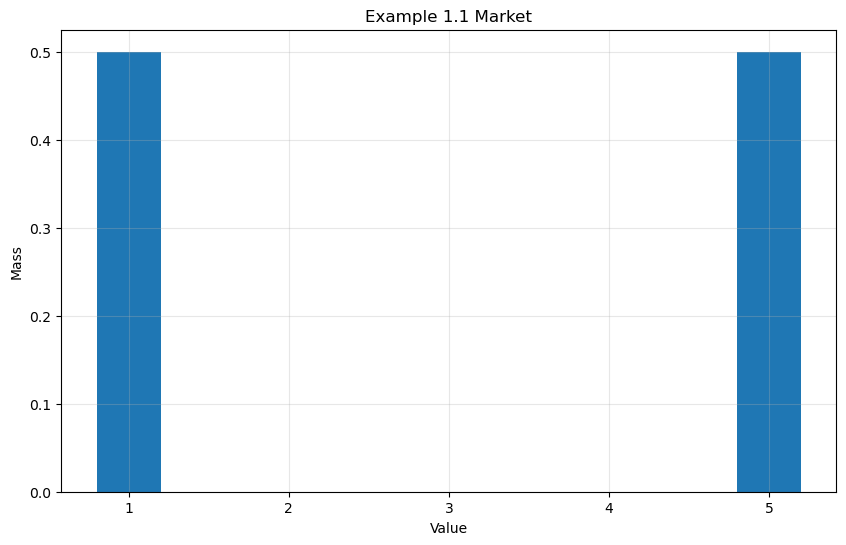

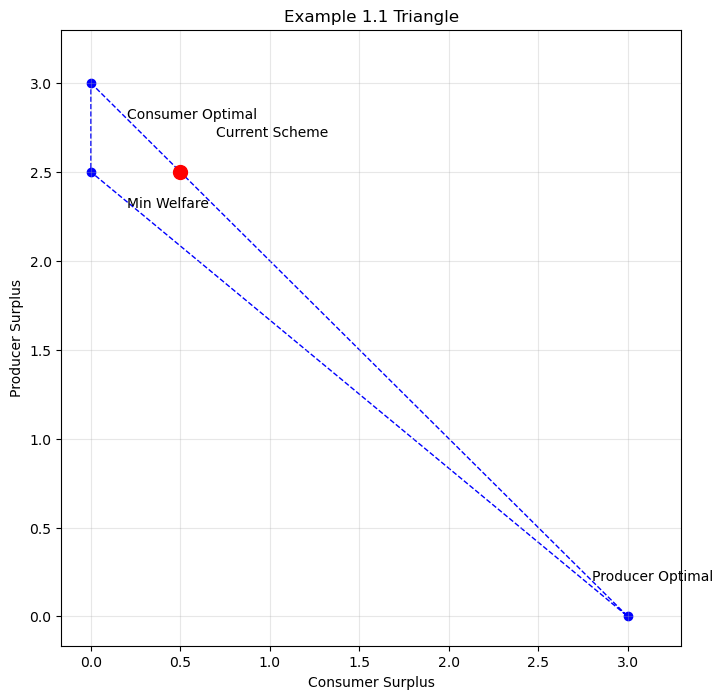

In [3]:
# 市场定义：两种价值，均匀分布
values = [1, 5]
masses = [0.5, 0.5]
market = Market(values, masses)

print("统一价格最优解：", market.optimal_price())
print("统一价格收益：", market.revenue(market.optimal_price()[0]))

# 应用BBM算法
scheme = bbm(market)
print("消费者剩余:", scheme.consumer_surplus())
print("生产者剩余:", scheme.producer_surplus())
print("社会福利:", scheme.social_welfare())

# 可视化
plot_market(market, title="Example 1.1 Market")
plot_surplus_triangle(market, scheme, values, title="Example 1.1 Triangle")

## 示例 1.2：Passive 中介下的F可行性与分段方案验证

统一价格最优解： [10]
统一价格收益： 3.0

Direct verification for Example 1.2 with F={4,5}
Segment 1: [0.18 0.2  0.   0.12], optimal prices: [4]
Segment 2: [0.12 0.   0.2  0.18], optimal prices: [5]
Direct verification succeeded!
F = [4, 5] 是否可行： True
消费者剩余: 1.58
生产者剩余: 3.22
社会福利: 4.800000000000001


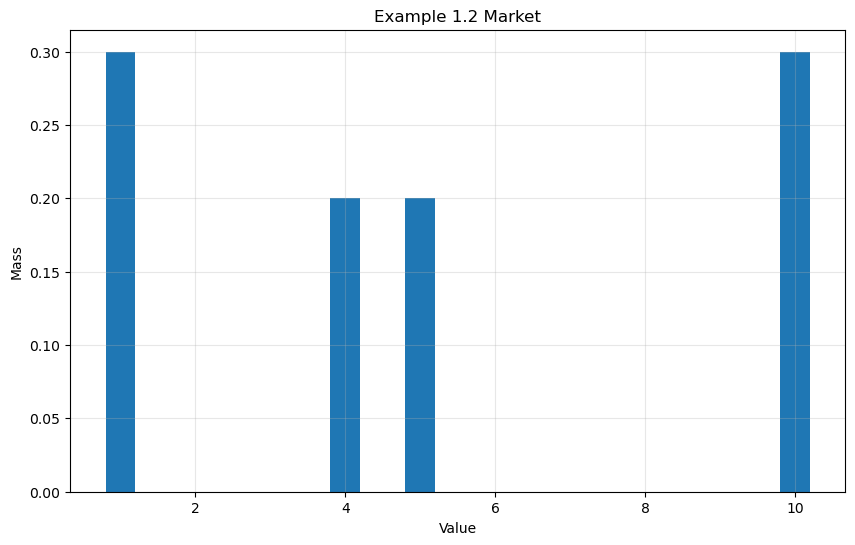

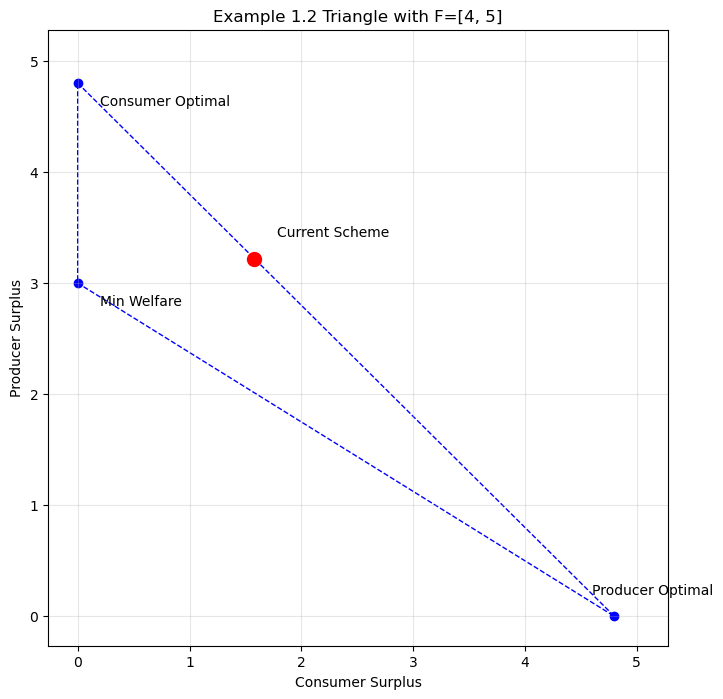

In [4]:
# 市场定义
values = [1, 4, 5, 10]
masses = [0.3, 0.2, 0.2, 0.3]
market = Market(values, masses)
F = [4, 5]
print("统一价格最优解：", market.optimal_price())
print("统一价格收益：", market.revenue(market.optimal_price()[0]))

# 可行性判断
feasible = is_feasible(market, F, debug=True)
print(f"F = {F} 是否可行：", feasible)

if feasible:
    scheme = passive_ps_max(market, F)
    print("消费者剩余:", scheme.consumer_surplus())
    print("生产者剩余:", scheme.producer_surplus())
    print("社会福利:", scheme.social_welfare())
    plot_market(market, title="Example 1.2 Market")
    plot_surplus_triangle(market, scheme, F, title=f"Example 1.2 Triangle with F={F}")

### ✅ 总结
- 已成功实现并验证 BBM 和 PassivePSMax 算法
- 复现了论文中两个经典示例，并生成可视化图形
- 阶段一实验系统搭建完毕，为后续阶段提供了算法与工具支持